In [109]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,sys,warnings,itertools,math,time,datetime

import torch
from torch import nn as nn
from torch.nn import functional as F

import pandas as pd

from scipy import signal
from scipy.signal import butter,lfilter,sosfreqz
from scipy.fft import fft,ifft,fftfreq

import sounddevice as sd

In [100]:
def butter_bandpass(lowcut,highcut,fs,order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

## Specifications

* Center Frequency: 100.122 MHz
* Bandwidth: 2.5 MHz
* Samples per Second: $2.5\times 10^6$
* Gain: 40dB
* Sample rate: 

In [101]:
path = './../../../../../Documents/RadioCaps/'

In [102]:
# Load file as double
data = np.fromfile(path+'FMcapture1.dat',dtype=np.uint8).astype('double')

# Normalize unsigned to zero-centered range
data = data - 127.5

# Extract IQ values
data = data[::2] + 1j*data[1::2]

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


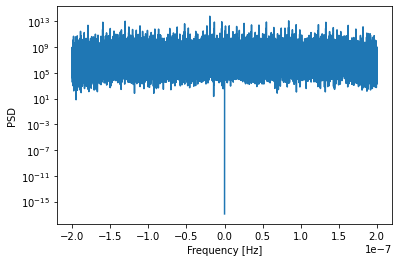

In [104]:
# Plot full PSD

f,Pxx_den = signal.periodogram(data,1/(2.5e6))

plt.semilogy(f, Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

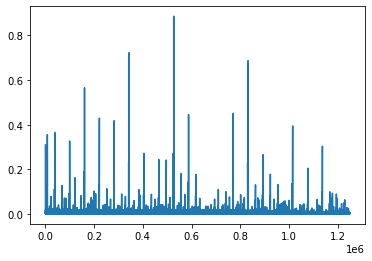

In [124]:
# Plot spectrum

F = fft(data)
ff = fftfreq(25000000,1/(2.5e6))[:25000000//2]

plt.plot(ff,2.0/25000000*np.abs(F[0:25000000//2]))
plt.show()

In [105]:
# Apply bandpass
data_f = butter_bandpass_filter(data,lowcut=1.004e-7,highcut=1.0045e-7,fs=1/(2.5e6),order=6)

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


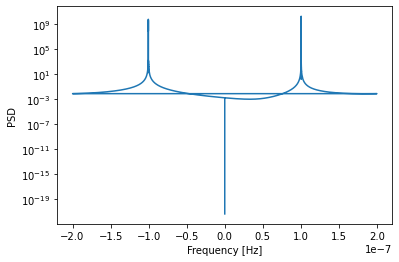

In [107]:
# Plot filtered PSD

f_f,Pxx_den_f = signal.periodogram(data_f,1/(2.5e6))

plt.semilogy(f_f, Pxx_den_f)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

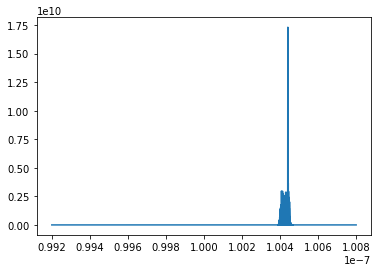

In [132]:
plt.plot(f[6200000:6300000],Pxx_den[6200000:6300000])
plt.show()

(array([2.716032e+06, 6.452599e+06, 6.834449e+06, 4.783174e+06,
        2.565032e+06, 1.113200e+06, 3.999310e+05, 1.082420e+05,
        2.081900e+04, 6.522000e+03]),
 array([2.75248353e-20, 8.10120470e-02, 1.62024094e-01, 2.43036141e-01,
        3.24048188e-01, 4.05060235e-01, 4.86072282e-01, 5.67084329e-01,
        6.48096376e-01, 7.29108423e-01, 8.10120470e-01]),
 <BarContainer object of 10 artists>)

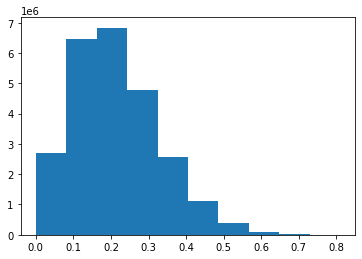

In [134]:
plt.hist(np.abs(data_f))

In [135]:
sd.play(np.abs(y),44100)

In [136]:
sd.stop()